<a href="https://colab.research.google.com/github/tungduongbk/tungduong/blob/master/Uber_usage_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM 4

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('uber_usage.csv')

In [0]:
df.drop(['CustomerID'], axis = 1, inplace=True)

In [0]:
df['Gender'] = df.Gender.astype('category')

In [0]:
df['Gender_encoded'] = df.Gender.cat.codes
df = df[['Gender', 'Age', 'AnnualSalary', 'Gender_encoded', 'RegularRider']]
df.head()

,Gender,Age,AnnualSalary,Gender_encoded,RegularRider
0,Male,19,19000,1,0
1,Male,35,20000,1,0
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,1,0


In [0]:
data = df.values

In [0]:
X = data[:, 1:4]
Y = data[:, 4]

### a ) Split the dataset to training set and test set using the ratio training set : test set = 7 : 3. The utility model selection.train test split can be used to split the dataset

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
Y_train, Y_test = Y_train.astype('int'), Y_test.astype('int')

### b) Use scikit-learn’s StandardScaler, fit and transform each feature (age, annual salary) into a standard normal distribution. Then use the same parameters of the distributions to transform the test set.

In [0]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)

In [0]:
X_test_scale = scaler.transform(X_test)

### c) Use scikit-learn’s Logistic Regression model linear model.LogisticRegression to train a model on the training set and apply it to the test set.

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression(max_iter=100)
model.fit(X_train_scale, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predict = model.predict(X_test_scale)
predict_proba = model.predict_proba(X_test_scale)[:,1]

### d) Calculate the TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC on the training set and test set. Compare the AUC on the training set and test set.

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support

#### Calculate TPR, FPR, Precision, Recall, F1 score, AUC for test set using sklearn metrics

In [0]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_proba) 
print(fpr)
print(tpr)

[0.         0.         0.         0.01265823 0.01265823 0.02531646
 0.02531646 0.03797468 0.03797468 0.05063291 0.05063291 0.10126582
 0.10126582 0.12658228 0.12658228 0.13924051 0.13924051 0.18987342
 0.18987342 0.32911392 0.35443038 0.51898734 0.51898734 1.        ]
[0.         0.02439024 0.14634146 0.14634146 0.48780488 0.48780488
 0.56097561 0.56097561 0.65853659 0.65853659 0.80487805 0.80487805
 0.87804878 0.87804878 0.92682927 0.92682927 0.95121951 0.95121951
 0.97560976 0.97560976 0.97560976 0.97560976 1.         1.        ]


In [0]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9484408768138315

In [0]:
conf_matrix = confusion_matrix(Y_test, predict)
conf_matrix

array([[74,  5],
       [ 8, 33]])

In [0]:
precision_recall_fscore_support(Y_test, predict, average='macro')

(0.8854300385109115, 0.8707934547699907, 0.8773488481798883, None)

#### Calculate TPR, FPR, Precision, Recall, F1 score, AUC for training set using sklearn metrics

In [0]:
predict_on_train = model.predict_proba(X_train_scale)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, predict_on_train)
print(fpr_train)
print(tpr_train)

[0.         0.         0.         0.00561798 0.00561798 0.01123596
 0.01123596 0.01685393 0.01685393 0.02247191 0.02247191 0.02808989
 0.02808989 0.03370787 0.03370787 0.03932584 0.03932584 0.04494382
 0.04494382 0.0505618  0.0505618  0.05617978 0.05617978 0.06179775
 0.06179775 0.06741573 0.06741573 0.07303371 0.07303371 0.07865169
 0.07865169 0.08988764 0.08988764 0.09550562 0.09550562 0.1011236
 0.11235955 0.11797753 0.11797753 0.12359551 0.12359551 0.12921348
 0.12921348 0.14606742 0.14606742 0.15168539 0.15168539 0.16292135
 0.16292135 0.18539326 0.18539326 0.19101124 0.19101124 0.19662921
 0.19662921 0.21910112 0.21910112 0.23595506 0.23595506 0.24719101
 0.25280899 0.26966292 0.26966292 0.30898876 0.30898876 0.32022472
 0.32022472 0.34831461 0.34831461 0.36516854 0.36516854 0.73033708
 0.74157303 0.83707865 0.84831461 1.        ]
[0.         0.00980392 0.11764706 0.11764706 0.12745098 0.12745098
 0.15686275 0.15686275 0.26470588 0.26470588 0.35294118 0.35294118
 0.40196078 0.401

In [0]:
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_train

0.9163361974003085

## Visualization 

In [0]:
df_train = pd.DataFrame(X_train)
df_train.columns = ['Age', 'AnnualSalary', 'Gender_encoded']
df_train.merge(pd.DataFrame(Y), axis = 0)
df_train

TypeError: merge() got an unexpected keyword argument 'axis'

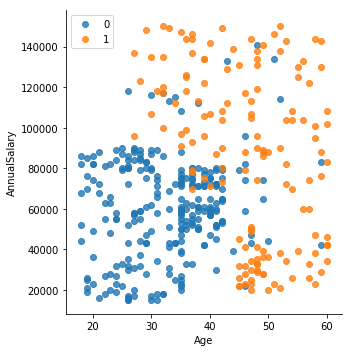

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Age", y="AnnualSalary", data= pd.DataFrame(X_train)['Age', fit_reg=False, hue='RegularRider', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='top right')
 
plt.show()
